### Customer Churn Analysis<br>
**Problem Statement:**<br>
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.<br>

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.<br>

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. <br>

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.<br>

In [6]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('max_columns',None)
warnings.filterwarnings('ignore')
from termcolor import colored

In [103]:
## Reading the dataset
data=pd.read_csv('Telecom_customer_churn.csv')
## Saving a copy of the original dataset
data_copy=data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
## Dropping the 'customerID'
data.drop('customerID',axis=1,inplace=True)

In [105]:
data.shape

(7043, 20)

In [106]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include='object').columns)

print(colored('No ofcolumns with object data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include='object').columns))

columns with object data: 
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
No ofcolumns with object data: 
17


In [107]:
print(colored('columns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['int64','float64']).columns)

print(colored('No ofcolumns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include=['int64','float64']).columns))

columns with numeric data: 
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
No ofcolumns with numeric data: 
3


- We have 19 features and 7043 observations
- 16 features have object data and 3 have numeric data as per above lists
- 'Churn' is our target and has object data type
- 'TotalCharges' store numbers but in object datatype. Need to change it to int.

In [108]:
data['TotalCharges'].replace(" ",np.nan,inplace=True)

In [109]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

In [110]:
## Checking for null values
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- 'TotalCharges' have 11 null values. Will replace them with the mean of 'TotalCharges'.

In [111]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)

In [112]:
data['TotalCharges'].isnull().sum()

0

- Successfully filled null values in 'TotalCharges'

<Font color='red'>
 
# EDA

- Cecking the number of classes and their respective frequencies in the target

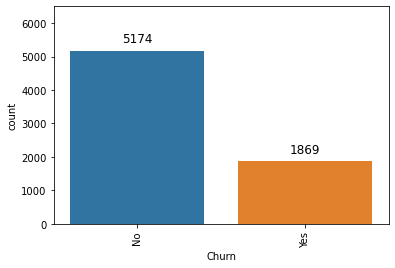

In [113]:
plt.figure(figsize=(6,4))
plt.ylim(0,6500)
plt.xticks(rotation=90)
ax=sns.countplot(data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+1000), ha='center', va='top', color='black', size=12)
plt.show()

- We have two classes in 'Churn':
 - 'No' forming about 73.5% of 'Churn' with 5174 observations
 - 'Yes' forming about 26.5% of 'Churn' with 1869 observations

In [114]:
cat_feat=data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']]

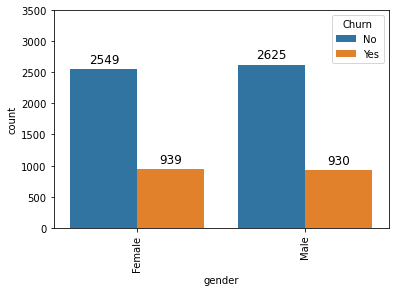

In [115]:
plt.figure(figsize=(6,4))
plt.ylim(0,3500)
plt.xticks(rotation=90)
ax=sns.countplot(data['gender'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+500), ha='center', va='top', color='black', size=12)
plt.show()

- The proportion of 'Churn' to 'Retain' is almost same in both males and females

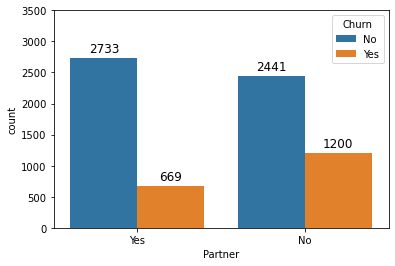

In [116]:
plt.figure(figsize=(6,4))
plt.ylim(0,3500)
plt.xticks(rotation=0)
ax=sns.countplot(data['Partner'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+500), ha='center', va='top', color='black', size=12)
plt.show()

- Customers with partners tend to churn more.

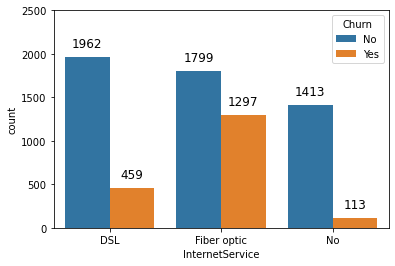

In [117]:
plt.figure(figsize=(6,4))
plt.ylim(0,2500)
plt.xticks(rotation=0)
ax=sns.countplot(data['InternetService'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Customers with 'Fiber optic' internet sevice are churning in high numbers.

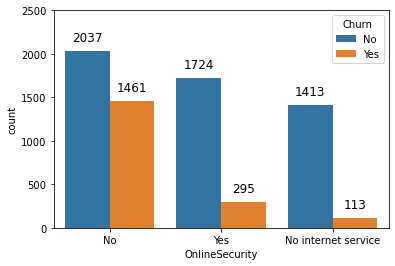

In [118]:
plt.figure(figsize=(6,4))
plt.ylim(0,2500)
plt.xticks(rotation=0)
ax=sns.countplot(data['OnlineSecurity'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Churn to Retain ratio is high in customers with No 'OnlineSecurity'

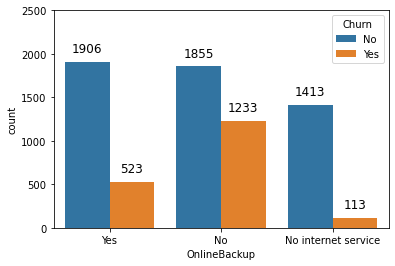

In [119]:
plt.figure(figsize=(6,4))
plt.ylim(0,2500)
plt.xticks(rotation=0)
ax=sns.countplot(data['OnlineBackup'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Churn to Retain ratio is high in customers with No 'OnlineBackup'

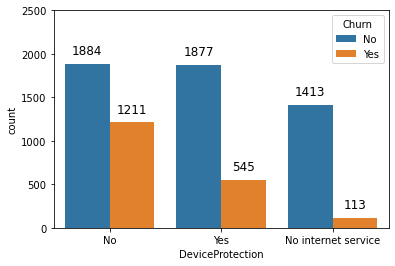

In [120]:
plt.figure(figsize=(6,4))
plt.ylim(0,2500)
plt.xticks(rotation=0)
ax=sns.countplot(data['DeviceProtection'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Proportion of churning is high in customers with No 'DeviceProtection'

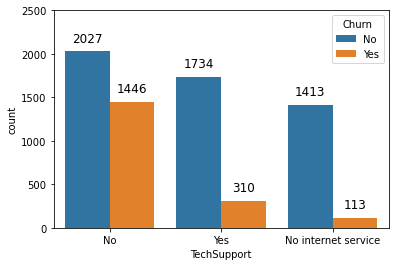

In [121]:
plt.figure(figsize=(6,4))
plt.ylim(0,2500)
plt.xticks(rotation=0)
ax=sns.countplot(data['TechSupport'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Churn to Retain ratio is high in customers who do not opt for 'TechSupport'

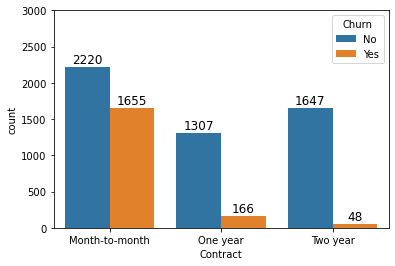

In [122]:
plt.figure(figsize=(6,4))
plt.ylim(0,3000)
plt.xticks(rotation=0)
ax=sns.countplot(data['Contract'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Customers with 'Mont-to-Month' contract tend to churn more.

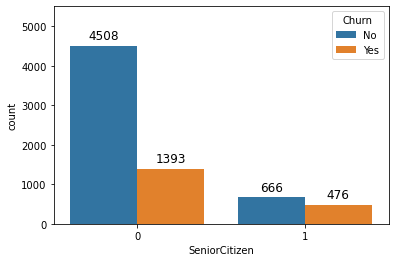

In [123]:
plt.figure(figsize=(6,4))
plt.ylim(0,5500)
plt.xticks(rotation=0)
ax=sns.countplot(data['SeniorCitizen'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+800), ha='center', va='top', color='black', size=12)
plt.show()

- 'SeniorCitizen' tend to churn more than the younger customers 

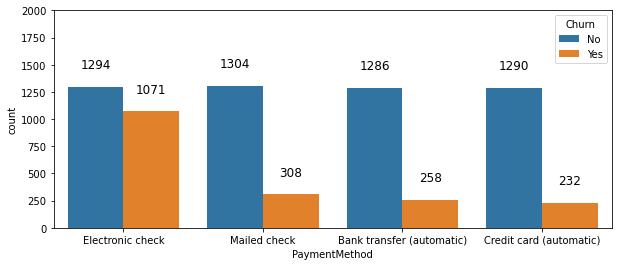

In [124]:
plt.figure(figsize=(10,4))
plt.ylim(0,2000)
plt.xticks(rotation=0)
ax=sns.countplot(data['PaymentMethod'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+400), ha='center', va='top', color='black', size=12)
plt.show()

- Customers who are opting for 'Electronic Check' payment method are churning more

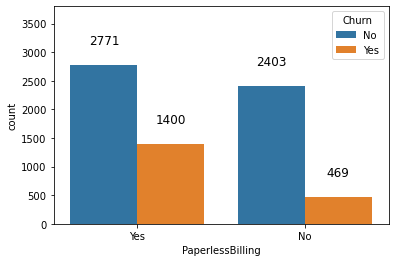

In [125]:
plt.figure(figsize=(6,4))
plt.ylim(0,3800)
plt.xticks(rotation=0)
ax=sns.countplot(data['PaperlessBilling'],hue=data['Churn'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+800), ha='center', va='top', color='black', size=12)
plt.show()

- Customers with 'PaperlessBilling' tend to churn more

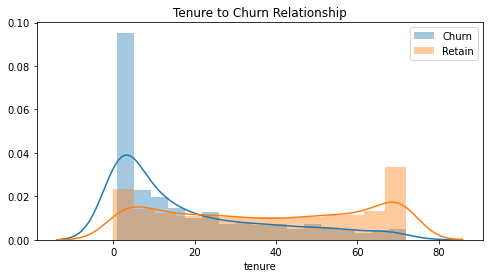

In [126]:
plt.figure(figsize=(8,4))
plt.title('Tenure to Churn Relationship')
sns.distplot(data[data['Churn'] == 'Yes']['tenure'], label='Churn')
sns.distplot(data[data['Churn'] == 'No']['tenure'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

- Longer the customer uses the network lower the chances of him/her churning

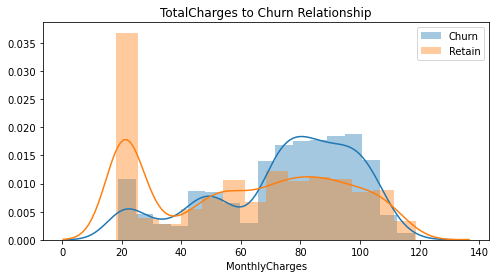

In [127]:
plt.figure(figsize=(8,4))
plt.title('TotalCharges to Churn Relationship')
sns.distplot(data[data['Churn'] == 'Yes']['MonthlyCharges'], label='Churn')
sns.distplot(data[data['Churn'] == 'No']['MonthlyCharges'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

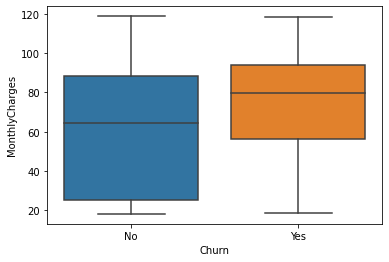

In [128]:
sns.boxplot(y=data['MonthlyCharges'],x=data['Churn'])

- The mean 'MonthlyCharges' of the customers who are churning are more than the retained customers

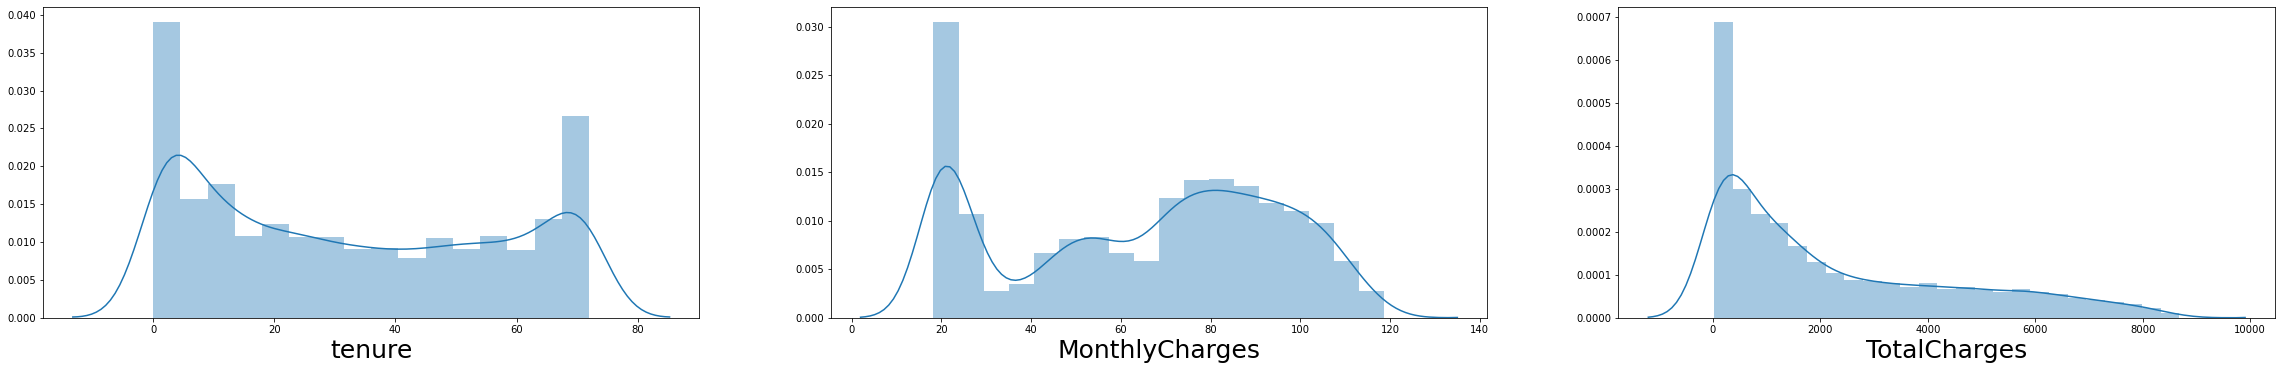

In [129]:
## Checking the distribution of the continuous features
cont_feat=data[['tenure', 'MonthlyCharges','TotalCharges']]
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<4:
        ax=plt.subplot(6,3,plot_number)
        sns.distplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [130]:
cont_feat.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

'TotalCharges' show high skewness

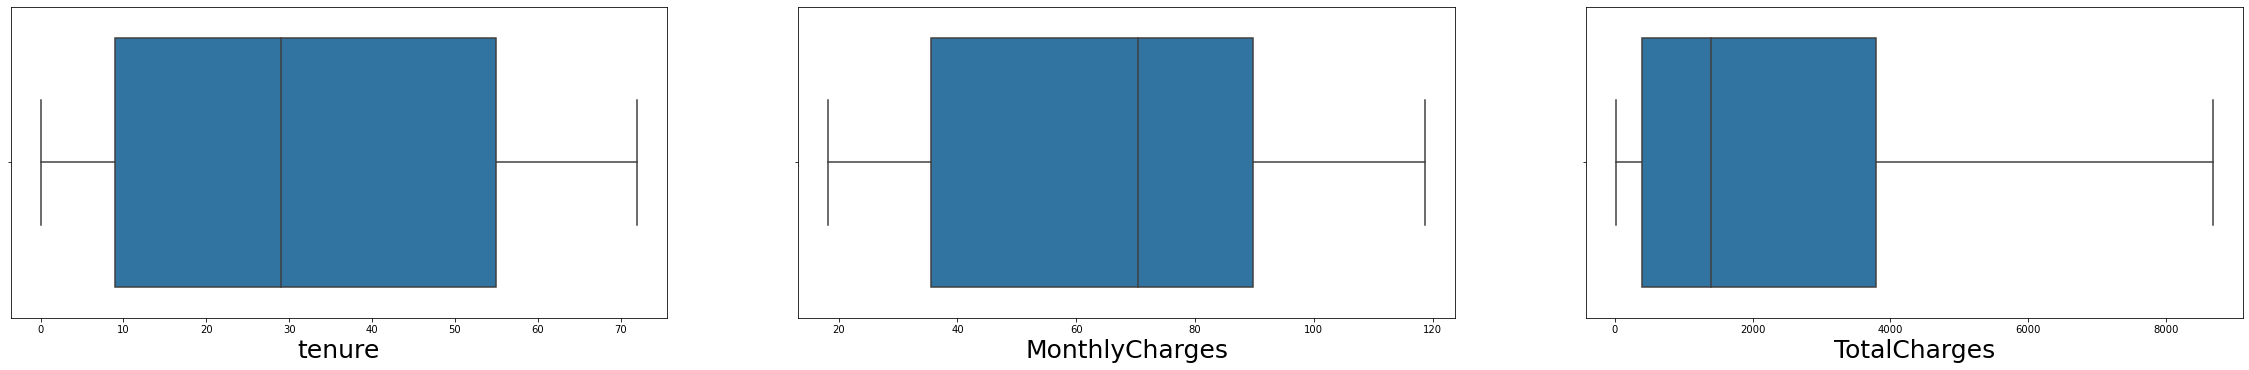

In [131]:
## Checking the distribution of the continuous features
cont_feat=data[['tenure', 'MonthlyCharges','TotalCharges']]
plt.figure(figsize=(40,40))
plot_number=1

for i in cont_feat:
    if plot_number<4:
        ax=plt.subplot(6,3,plot_number)
        sns.boxplot(cont_feat[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

- There are no outliers in any of the continuous features

In [132]:
## Applying square root transformation to reduce skewness
data['TotalCharges']=np.sqrt(data['TotalCharges'])
data['TotalCharges'].skew()

0.30784903124051693

**Encoding the object data in numeric data**

In [133]:
data=pd.get_dummies(data,drop_first=True)

In [136]:
data.shape

(7043, 31)

**Checking the relationship between Continuous features and the label**

In [149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [150]:
selectbest=SelectKBest(score_func=f_classif,k=3)
selectbest.fit(cont_feat,data['Churn_Yes'])

SelectKBest(k=3)

In [151]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cont_feat.columns)

In [152]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(3,'Scores')

,Features,Scores
0,tenure,997.268010
2,TotalCharges,291.629021
1,MonthlyCharges,273.463704


**Checking the relationship between Catagorical features and the label**

In [156]:
cat_feat=data.drop(['MonthlyCharges','TotalCharges','tenure','Churn_Yes'],axis=1)

In [157]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [158]:
selectbest=SelectKBest(score_func=chi2,k=27)
selectbest.fit(cat_feat,data['Churn_Yes'])

SelectKBest(k=27, score_func=<function chi2 at 0x0000029066770700>)

In [159]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cat_feat.columns)

In [160]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(27,'Scores')

,Features,Scores
22,Contract_Two year,488.578090
25,PaymentMethod_Electronic check,426.422767
7,InternetService_Fiber optic,374.476216
13,DeviceProtection_No internet service,286.520193
15,TechSupport_No internet service,286.520193
19,StreamingMovies_No internet service,286.520193
17,StreamingTV_No internet service,286.520193
8,InternetService_No,286.520193
9,OnlineSecurity_No internet service,286.520193
11,OnlineBackup_No internet service,286.520193


- Will drop 'MultipleLines_Yes', 'MultipleLines_No phone service', 'gender_Male', 'PhoneService_Yes' as they show very weak relationship with the target.

In [161]:
data.drop(['MultipleLines_Yes', 'MultipleLines_No phone service', 'gender_Male', 'PhoneService_Yes'],axis=1,inplace=True)

In [162]:
data.shape

(7043, 27)

**Seperating the features and the target**

In [163]:
X=data.drop('Churn_Yes',axis=1)
y=data['Churn_Yes']

**Scaling the features**

In [164]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [165]:
X_scaled=scaler.fit_transform(X)

**Splitting the data into training and testing sets**

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

**Importing the classification performance metrics**

In [168]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_roc_curve,roc_curve
from sklearn.model_selection import cross_val_score

## Model 1: Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()

In [170]:
lrc.fit(X_train,y_train)

LogisticRegression()

In [172]:
y_lrc=lrc.predict(X_test)

In [173]:
lrc_score=accuracy_score(y_test,y_lrc)
lrc_score

0.8057921635434412

In [174]:
lrc_cvs=cross_val_score(lrc,X_scaled,y,cv=5).mean()
lrc_cvs

0.8006534695786824

In [175]:
lrc_f1=f1_score(y_test,y_lrc)
lrc_f1

0.6023255813953488

In [176]:
print(confusion_matrix(y_test,y_lrc))

[[1160  122]
 [ 220  259]]


In [177]:
print(classification_report(y_test,y_lrc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1282
           1       0.68      0.54      0.60       479

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



## Model 2: SVC


In [178]:
from sklearn.svm import SVC
svc=SVC()

In [179]:
svc.fit(X_train,y_train)

SVC()

In [180]:
y_svc=svc.predict(X_test)

In [181]:
svc_score=accuracy_score(y_test,y_svc)
svc_score

0.7978421351504826

In [182]:
svc_cvs=cross_val_score(svc,X_scaled,y,cv=5).mean()
svc_cvs

0.797246697367572

In [183]:
svc_f1=f1_score(y_test,y_svc)
svc_f1

0.5647921760391198

In [184]:
print(confusion_matrix(y_test,y_svc))

[[1174  108]
 [ 248  231]]


In [185]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1282
           1       0.68      0.48      0.56       479

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



## Model 3: KNeighborsClassifier

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=7)

In [191]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [192]:
y_knc=knc.predict(X_test)

In [193]:
knc_score=accuracy_score(y_test,y_knc)
knc_score

0.7694491766042022

In [194]:
knc_cvs=cross_val_score(knc,X_scaled,y,cv=5).mean()
knc_cvs

0.7729674091876897

In [195]:
knc_f1=f1_score(y_test,y_knc)
knc_f1

0.5488888888888889

In [196]:
print(confusion_matrix(y_test,y_knc))

[[1108  174]
 [ 232  247]]


In [197]:
print(classification_report(y_test,y_knc))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1282
           1       0.59      0.52      0.55       479

    accuracy                           0.77      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.76      0.77      0.76      1761



## Model 4: Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [199]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [200]:
y_rfc=rfc.predict(X_test)

In [201]:
rfc_score=accuracy_score(y_test,y_rfc)
rfc_score

0.7932992617830777

In [202]:
rfc_cvs=cross_val_score(rfc,X_scaled,y,cv=5).mean()
rfc_cvs

0.7901476506548809

In [203]:
rfc_f1=f1_score(y_test,y_rfc)
rfc_f1

0.5656324582338902

In [204]:
print(confusion_matrix(y_test,y_rfc))

[[1160  122]
 [ 242  237]]


In [205]:
print(classification_report(y_test,y_rfc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1282
           1       0.66      0.49      0.57       479

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.78      0.79      0.78      1761



## Model 5: ADA Boost Classifier

In [206]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [207]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [208]:
y_abc=abc.predict(X_test)

In [209]:
abc_score=accuracy_score(y_test,y_abc)
abc_score

0.8001135718341851

In [210]:
abc_cvs=cross_val_score(abc,X_scaled,y,cv=5).mean()
abc_cvs

0.8020722103038904

In [211]:
abc_f1=f1_score(y_test,y_abc)
abc_f1

0.588785046728972

In [212]:
print(confusion_matrix(y_test,y_abc))

[[1157  125]
 [ 227  252]]


In [213]:
print(classification_report(y_test,y_abc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1282
           1       0.67      0.53      0.59       479

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



## Model 6: Gradient Boosting Classifier

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [215]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [216]:
y_gbc=gbc.predict(X_test)

In [217]:
gbc_score=accuracy_score(y_test,y_gbc)
gbc_score

0.7978421351504826

In [218]:
gbc_cvs=cross_val_score(gbc, X_scaled,y,cv=5).mean()
gbc_cvs

0.8030672341763985

In [219]:
gbc_f1=f1_score(y_test,y_gbc)
gbc_f1

0.5831381733021077

In [220]:
print(confusion_matrix(y_test,y_gbc))

[[1156  126]
 [ 230  249]]


In [221]:
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1282
           1       0.66      0.52      0.58       479

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



**Storing performance metrics for all the models in a single dataframe**

In [222]:
metrics=pd.DataFrame()
metrics['Model']=['Logistic Regression','ADAboost Classifier','KNN Classifier','SVC','RandomForest Classifier','GradientBoosting Classifier']
metrics['Accuracy Score']=[lrc_score,abc_score,knc_score,svc_score,rfc_score,gbc_score]
metrics['Cross Val Score']=[lrc_cvs,abc_cvs,knc_cvs,svc_cvs,rfc_cvs,gbc_cvs]
metrics['f1 Score']=[lrc_f1,abc_f1,knc_f1,svc_f1,rfc_f1,gbc_f1]

metrics

,Model,Accuracy Score,Cross Val Score,f1 Score
0,Logistic Regression,0.805792,0.800653,0.602326
1,ADAboost Classifier,0.800114,0.802072,0.588785
2,KNN Classifier,0.769449,0.772967,0.548889
3,SVC,0.797842,0.797247,0.564792
4,RandomForest Classifier,0.793299,0.790148,0.565632
5,GradientBoosting Classifier,0.797842,0.803067,0.583138


### Plotting the ROC_AUC curve


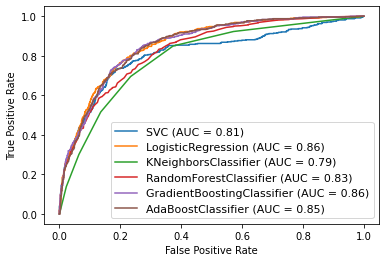

In [223]:
disp=plot_roc_curve(svc,X_test,y_test)

plot_roc_curve(lrc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

##### Based on Accuracy Score, Cross Val Score, f1 Score and AUC, Logistic Regression Classifier is our best model


<font color='red'>
    
## Tuning the hyperparameters of the best model

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
lrc_grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],
         'C':[1.0,2.0,5.0],'tol':[0.0001,0.001],
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

In [226]:
gridCV=GridSearchCV(lrc,param_grid=lrc_grid,n_jobs=-1)

In [227]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0, 5.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001]})

In [228]:
gridCV.best_params_

{'C': 2.0, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}

In [229]:
lrc_best=LogisticRegression()

In [230]:
lrc_best.fit(X_train,y_train)

LogisticRegression()

In [231]:
y_best=lrc_best.predict(X_test)

In [232]:
best_score=accuracy_score(y_test,y_best)
best_score

0.8057921635434412

In [233]:
best_cvs=cross_val_score(lrc_best,X_scaled,y,cv=7).mean()
best_cvs

0.8009356261353711

In [234]:
best_f1=f1_score(y_test,y_best)
best_f1

0.6023255813953488

In [235]:
print(confusion_matrix(y_test,y_best))

[[1160  122]
 [ 220  259]]


In [236]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1282
           1       0.68      0.54      0.60       479

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



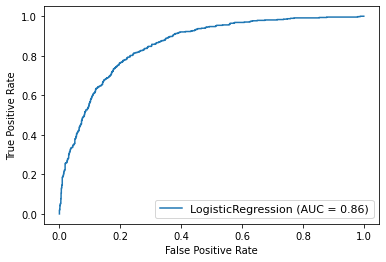

In [237]:
## Plotting the roc_auc curve for the best model
disp=plot_roc_curve(lrc_best,X_test,y_test)

plt.legend(prop={'size':11},loc='lower right')

**Saving the best model**

In [238]:
## Saving the best model
import pickle
filename='CustomerChurn_lrc.pkl'
pickle.dump(lrc_best,open(filename,'wb'))